In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import - Data info - Count

In [2]:
df = pd.read_csv('default.csv');df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    int64  
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


In [4]:
df['Status'].value_counts() # status is the target column

No         656
Default    125
Name: Status, dtype: int64

In [5]:
df.isnull().sum()

Gender           0
LoanOffered      0
Job              0
WorkExp          0
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64

In [6]:
df.duplicated().sum()

13

In [7]:
df.drop_duplicates(keep ='first', inplace=True)

In [8]:
df.duplicated().sum()
#no more duplicates 

0

In [9]:
pd.crosstab(df['Status'],df['LoanOffered'],normalize='columns')

LoanOffered,0,1
Status,,
Default,0.096774,0.175258
No,0.903226,0.824742


In [10]:
pd.crosstab(df['Status'],df['Ownhouse'],normalize='columns')

Ownhouse,0,1
Status,,
Default,0.676136,0.001689
No,0.323864,0.998311


In [11]:
pd.crosstab(df['Status'],df['Dependents'],normalize='columns')

Dependents,0,1,2,3,4
Status,,,,,
Default,0.530612,0.554054,0.074468,0.021127,0.0
No,0.469388,0.445946,0.925532,0.978873,1.0


In [12]:
pd.crosstab(df['Status'],df['CreditHistory'],normalize='columns')

CreditHistory,critical,good,poor,verygood
Status,,,,
Default,0.184358,0.137931,0.354167,0.08046
No,0.815642,0.862069,0.645833,0.91954


In [13]:
pd.crosstab(df['Status'],df['Purpose'],normalize='columns')

Purpose,car,consumerdurable,education,personal
Status,,,,
Default,0.156863,0.152174,0.138211,0.184211
No,0.843137,0.847826,0.861789,0.815789


# EDA

<AxesSubplot:>

<Figure size 1080x1080 with 0 Axes>

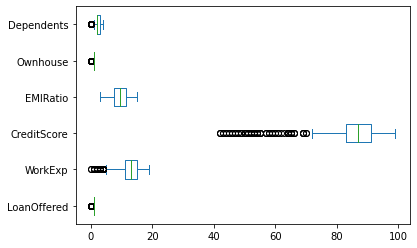

In [14]:
plt.figure(figsize=(15,15))
df.plot.box(vert=0)

<AxesSubplot:>

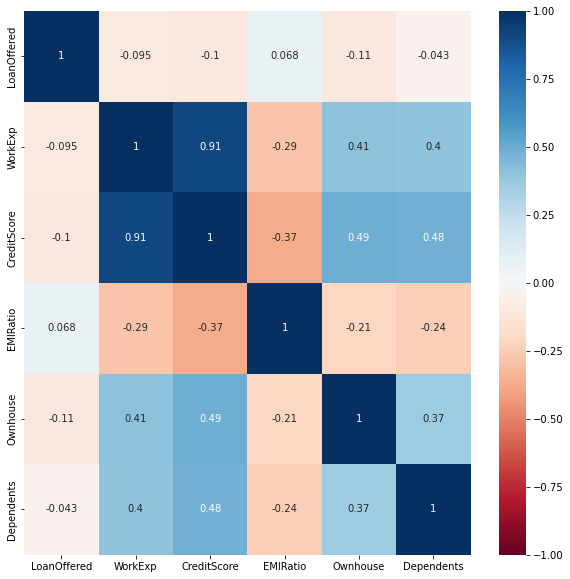

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin = -1, cmap = 'RdBu' , annot = True)
#work expirience and credit score is highly correlated, lets consider credit score alone.

# EDA - Continous

<AxesSubplot:ylabel='Density'>

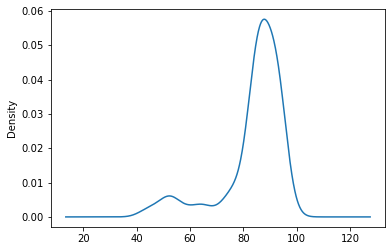

In [16]:
df['CreditScore'].plot.kde()

<AxesSubplot:ylabel='Density'>

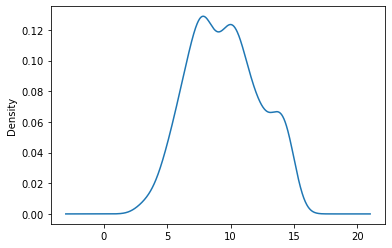

In [17]:
df['EMIRatio'].plot.kde()

<AxesSubplot:xlabel='Status', ylabel='CreditScore'>

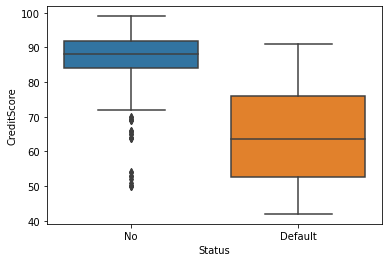

In [18]:
sns.boxplot(data = df, x = 'Status', y = 'CreditScore')

<AxesSubplot:xlabel='Status', ylabel='EMIRatio'>

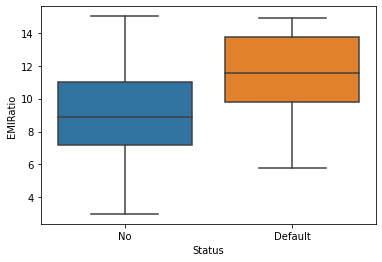

In [19]:
sns.boxplot(data = df, x = 'Status', y = 'EMIRatio')

<AxesSubplot:xlabel='Status', ylabel='WorkExp'>

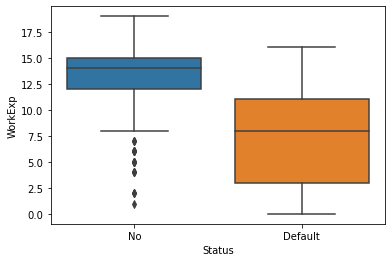

In [20]:
sns.boxplot(data = df, x = 'Status', y = 'WorkExp')

<AxesSubplot:xlabel='Status', ylabel='Dependents'>

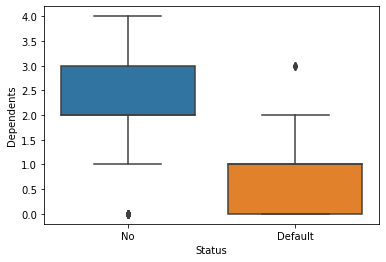

In [21]:
sns.boxplot(data = df, x = 'Status', y = 'Dependents')

# EDA - Categorical

<AxesSubplot:xlabel='Status', ylabel='count'>

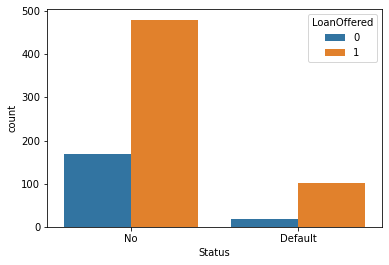

In [22]:
sns.countplot(data = df, hue='LoanOffered', x='Status' )

<AxesSubplot:xlabel='Status', ylabel='count'>

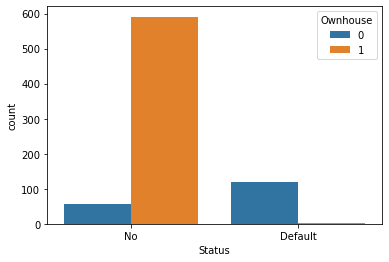

In [23]:
sns.countplot(data = df, hue='Ownhouse', x='Status' )

<AxesSubplot:xlabel='Status', ylabel='count'>

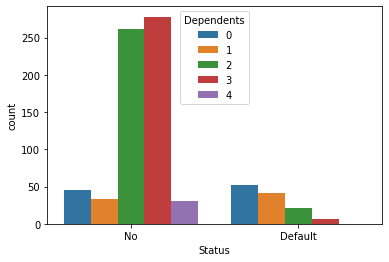

In [24]:
sns.countplot(data = df, hue='Dependents', x='Status' )

<AxesSubplot:xlabel='Status', ylabel='count'>

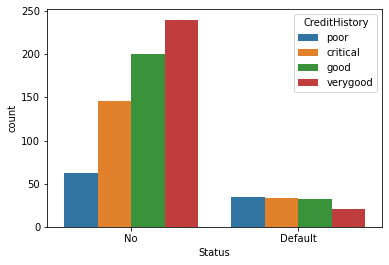

In [25]:
sns.countplot(data = df, hue='CreditHistory', x='Status' )

<AxesSubplot:xlabel='Status', ylabel='count'>

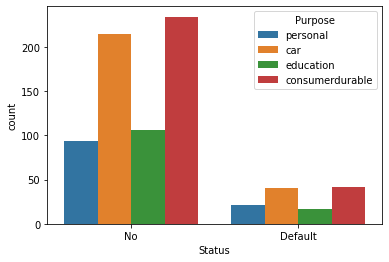

In [26]:
sns.countplot(data = df, hue='Purpose', x='Status' )

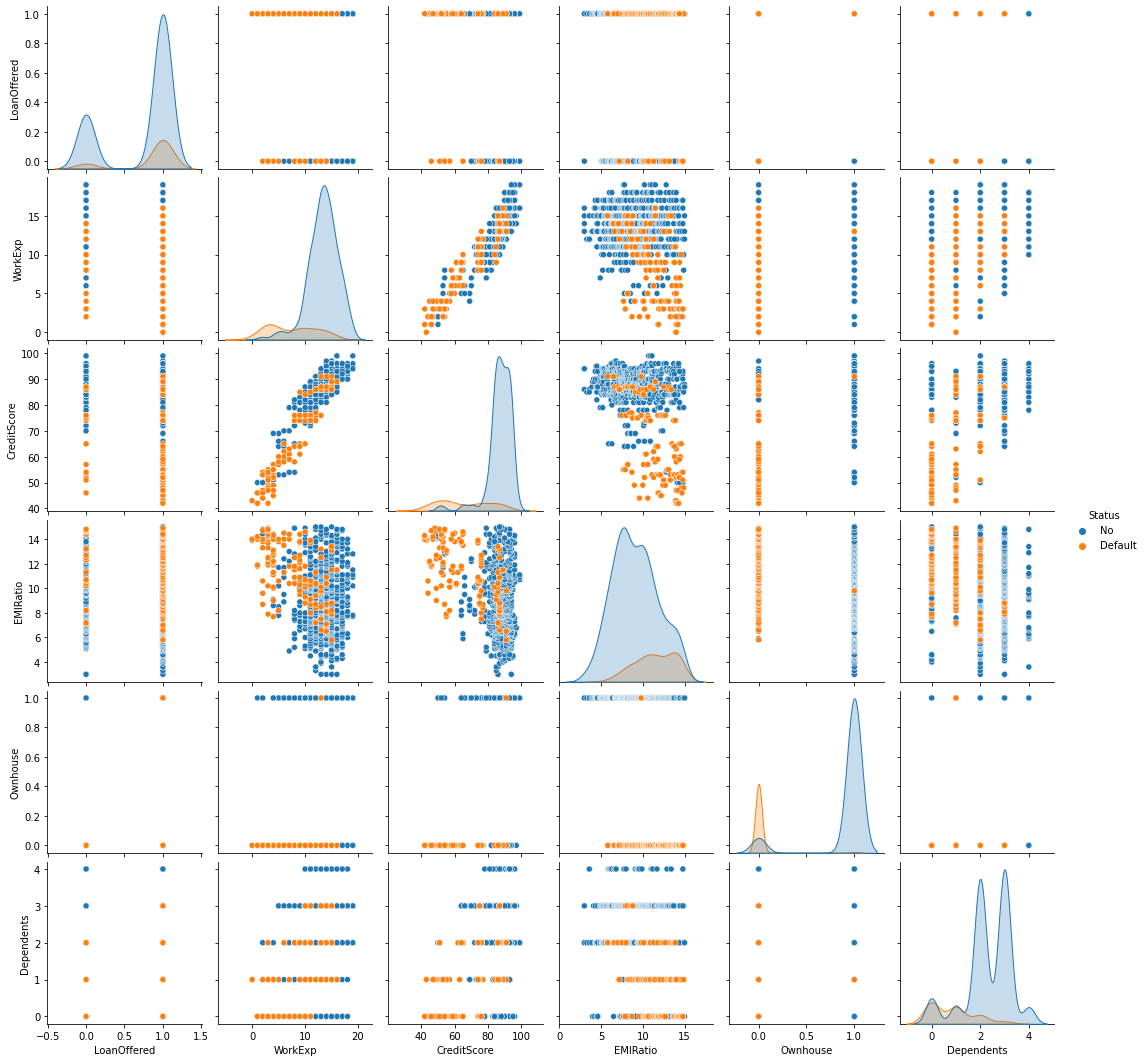

In [27]:
sns.pairplot(data = df, hue = 'Status')

# Label encoding and CHI square test

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 779
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         768 non-null    object 
 1   LoanOffered    768 non-null    int64  
 2   Job            768 non-null    object 
 3   WorkExp        768 non-null    int64  
 4   CreditScore    768 non-null    int64  
 5   EMIRatio       768 non-null    float64
 6   Status         768 non-null    object 
 7   CreditHistory  768 non-null    object 
 8   Ownhouse       768 non-null    int64  
 9   Purpose        768 non-null    object 
 10  Dependents     768 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 72.0+ KB


In [270]:
df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2


In [271]:
df['Gender'].value_counts()

Male      537
Female    231
Name: Gender, dtype: int64

In [272]:
df['Job'].value_counts()

skilled       550
Management    117
unskilled     101
Name: Job, dtype: int64

In [273]:
df['Status'].value_counts()

No         648
Default    120
Name: Status, dtype: int64

In [274]:
df['CreditHistory'].value_counts()

verygood    261
good        232
critical    179
poor         96
Name: CreditHistory, dtype: int64

In [275]:
df['Purpose'].value_counts()

consumerdurable    276
car                255
education          123
personal           114
Name: Purpose, dtype: int64

In [276]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Job'] = df['Job'].map({'skilled':2,'Management':1,'unskilled':0})
df['CreditHistory'] = df['CreditHistory'].map({'verygood':3,'good':2,'critical':1,'poor':0})
df['Purpose'] = df['Purpose'].map({'consumerdurable':3,'car':2,'education':1,'personal':0})
df['Status'] = df['Status'].map({'Default':1,'No':0})

In [277]:
df.head()
#all of our categorical variables have been encoded. 

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,1,0,0,14,86,3.0,0,0,1,0,2
1,0,1,2,15,94,3.0,0,0,1,0,3
2,1,0,0,16,86,3.0,0,0,1,0,2
3,0,1,2,13,94,3.0,0,0,1,0,3
4,1,1,2,12,85,3.3,0,0,1,0,2


In [278]:
#Chi square test of independence 

cat_cols=['Gender','LoanOffered','Job','CreditHistory','Purpose']

In [279]:
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import chi2_contingency

scol = []   #store cat_cols
spval = []  #Store Pvalue
ss = []  #results

for n in cat_cols:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(df[n], df['Status']))[1]
    spval.append(round(cp, 4))
    if cp < 0.5:
        ss.append('*')  # significant (rejects Null Hypothesis)
    else:
        ss.append('**')  # not significant (Accepts Null Hypothesis)

for i in range(len(scol)):
    if ss[i] == '*':
        print(f"{scol[i]} has a significant influence on Status column (Rejects Null Hypothesis)")
    else:
        print(f"{scol[i]} does not have a significant influence on column (Accepts Null Hypothesis)")

      

Gender has a significant influence on Status column (Rejects Null Hypothesis)
LoanOffered has a significant influence on Status column (Rejects Null Hypothesis)
Job has a significant influence on Status column (Rejects Null Hypothesis)
CreditHistory has a significant influence on Status column (Rejects Null Hypothesis)
Purpose does not have a significant influence on column (Accepts Null Hypothesis)


In [280]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})


,Feature,P-Value,Significance
0,Gender,0.2254,*
1,LoanOffered,0.0143,*
2,Job,0.0216,*
3,CreditHistory,0.0000,*
4,Purpose,0.7976,**


In [283]:
df.isnull().sum()

Gender           0
LoanOffered      0
Job              0
WorkExp          0
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64

# Data set split 

In [284]:
y = df['Status'];y.head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [285]:
X = df.drop('Status',axis = 1);X.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,CreditHistory,Ownhouse,Purpose,Dependents
0,1,0,0,14,86,3.0,0,1,0,2
1,0,1,2,15,94,3.0,0,1,0,3
2,1,0,0,16,86,3.0,0,1,0,2
3,0,1,2,13,94,3.0,0,1,0,3
4,1,1,2,12,85,3.3,0,1,0,2


In [288]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=111)


# Base model (Random Forest)

In [289]:
from sklearn.ensemble import RandomForestClassifier
RFC =RandomForestClassifier(n_estimators=50)
RFC.fit(X_train,y_train)
RFC.score(X_test,y_test)


0.9895833333333334

In [290]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_test_predict = RFC.predict(X_test)
model_score = RFC.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On testing dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.9895833333333334
confusion matrix:
 [[157   1]
 [  1  33]]
On testing dataset:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.97      0.97      0.97        34

    accuracy                           0.99       192
   macro avg       0.98      0.98      0.98       192
weighted avg       0.99      0.99      0.99       192



In [291]:
from pandas import DataFrame
aa=confusion_matrix(y_test_predict,y_test)
df1=DataFrame(aa,index=('Actual_0', 'Actual_1',),columns=('Predicted_0','Predicted_1'))
df1

,Predicted_0,Predicted_1
Actual_0,157,1
Actual_1,1,33


# SVM (support vector machines)

In [292]:
from sklearn.svm import SVC
svm = SVC(C = 10)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8854166666666666

In [293]:
y_test_predict = svm.predict(X_test)
model_score = svm.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On testing dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.8854166666666666
confusion matrix:
 [[155   3]
 [ 19  15]]
On testing dataset:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       158
           1       0.83      0.44      0.58        34

    accuracy                           0.89       192
   macro avg       0.86      0.71      0.76       192
weighted avg       0.88      0.89      0.87       192



In [294]:
from pandas import DataFrame
ap=confusion_matrix(y_test_predict,y_test)
df11=DataFrame(ap,index=('Actual_0', 'Actual_1'),columns=('Predicted_0','Predicted_1'))
df11

,Predicted_0,Predicted_1
Actual_0,155,19
Actual_1,3,15


In [295]:
from sklearn.model_selection import cross_val_score
print('cross validation with Rand Forest',cross_val_score(RandomForestClassifier(n_estimators = 50),X,y))

cross validation with Rand Forest [0.9025974  0.97402597 0.98051948 0.98039216 0.94117647]


In [296]:
print('cross validation with SVM',cross_val_score(SVC(C=10),X,y))

cross validation with SVM [0.87662338 0.8961039  0.93506494 0.95424837 0.90196078]


In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
print('cross validation with Logistic regr',cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X,y))
print('cross validation with KNN',cross_val_score(KNeighborsClassifier(n_neighbors=10),X,y))

cross validation with Logistic regr [0.88311688 0.96103896 0.99350649 0.98039216 0.79738562]
cross validation with KNN [0.91558442 0.94805195 0.97402597 0.92156863 0.92810458]


# MLP (normalized )

In [299]:
def scaler(x):
    p = (x - x.min())/(x.max() - x.min())
    return p
#custom normalizaion function ( min max normalization)

In [300]:
Xn = X.apply(scaler)

In [301]:
Xn.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,CreditHistory,Ownhouse,Purpose,Dependents
0,1.0,0.0,0.0,0.736842,0.771930,0.000,0.0,1.0,0.0,0.50
1,0.0,1.0,1.0,0.789474,0.912281,0.000,0.0,1.0,0.0,0.75
2,1.0,0.0,0.0,0.842105,0.771930,0.000,0.0,1.0,0.0,0.50
3,0.0,1.0,1.0,0.684211,0.912281,0.000,0.0,1.0,0.0,0.75
4,1.0,1.0,1.0,0.631579,0.754386,0.025,0.0,1.0,0.0,0.50


In [304]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xn,y,test_size=0.25,random_state=111)
from sklearn.neural_network import MLPClassifier

In [305]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train,y_train)
mlp.score(X_test,y_test) #(test data score)





0.9947916666666666

In [306]:
y_test_predict = mlp.predict(X_test)
model_score = mlp.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On testing dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.9947916666666666
confusion matrix:
 [[158   0]
 [  1  33]]
On testing dataset:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       158
           1       1.00      0.97      0.99        34

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [307]:

ap=confusion_matrix(y_test_predict,y_test)
df111=DataFrame(ap,index=('Actual_0', 'Actual_1'),columns=('Predicted_0','Predicted_1'))
df111

,Predicted_0,Predicted_1
Actual_0,158,1
Actual_1,0,33


In [308]:
mlp = MLPClassifier(max_iter=1000, random_state=42, hidden_layer_sizes=(100,),
    activation='tanh',
    solver='adam',
    alpha=0.01,
    batch_size='auto',
    learning_rate='constant',)
mlp.fit(X_train,y_train)
mlp.score(X_test,y_test)


0.9895833333333334

In [309]:
print('cross validation with KNN (with normalization):',cross_val_score(KNeighborsClassifier(n_neighbors=10),Xn,y))
print('cross validation with SVM (with normalization):',cross_val_score(SVC(C=10),Xn,y))


cross validation with KNN (with normalization): [0.87662338 0.92207792 0.97402597 0.94117647 0.96732026]
cross validation with SVM (with normalization): [0.93506494 0.96753247 0.99350649 0.9869281  0.97385621]


In [310]:
y_test_predict = mlp.predict(X_test)
model_score = mlp.score(X_test, y_test)
print('model score:',model_score)
print('confusion matrix:\n',confusion_matrix(y_test, y_test_predict))
print('On testing dataset:\n',classification_report(y_test, y_test_predict))

model score: 0.9895833333333334
confusion matrix:
 [[157   1]
 [  1  33]]
On testing dataset:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.97      0.97      0.97        34

    accuracy                           0.99       192
   macro avg       0.98      0.98      0.98       192
weighted avg       0.99      0.99      0.99       192



In [311]:

ap=confusion_matrix(y_test_predict,y_test)
df111=DataFrame(ap,index=('Actual_0', 'Actual_1'),columns=('Predicted_0','Predicted_1'))
df111

,Predicted_0,Predicted_1
Actual_0,157,1
Actual_1,1,33


# Batch normalized (KERAS)

In [314]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import matplotlib.pyplot as plt

2.13.0


In [315]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=111)


In [316]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [319]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #relu as default activation
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax)) #using sigmoid as we'd want a probability distribution

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10) #in sample fit

Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 0.5755 - accuracy: 0.8125
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.9184
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.9288
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.9288
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.9323
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9392
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9444
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.1690 - accuracy: 0.9375
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9497
Epoch 10/10
18/18 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9531


In [321]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)
#out sample accuracy and loss. Model seems to not have overfitting 

6/6 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.8229
0.5031836628913879
0.8229166865348816


In [322]:
predictions = model.predict(X_test)
print(predictions)

6/6 [==============================] - 0s 5ms/step
[[0.95795816 0.04204179]
 [0.95709246 0.04290761]
 [0.9653386  0.0346614 ]
 [0.9437756  0.05622438]
 [0.95857185 0.0414281 ]
 [0.96379197 0.03620804]
 [0.96059805 0.03940193]
 [0.9493209  0.05067907]
 [0.90204644 0.09795357]
 [0.95115954 0.04884045]
 [0.96016705 0.03983289]
 [0.95952964 0.04047041]
 [0.9511715  0.04882842]
 [0.9554131  0.04458696]
 [0.95386845 0.04613158]
 [0.91948915 0.08051082]
 [0.95448923 0.0455108 ]
 [0.9601052  0.03989476]
 [0.95239043 0.04760962]
 [0.9617475  0.03825246]
 [0.9580874  0.04191257]
 [0.95715207 0.04284788]
 [0.89731765 0.10268235]
 [0.93340784 0.06659219]
 [0.93537074 0.06462927]
 [0.9575608  0.04243922]
 [0.95223254 0.04776744]
 [0.9613591  0.03864093]
 [0.95547575 0.04452426]
 [0.9581196  0.04188038]
 [0.952485   0.04751501]
 [0.96243757 0.03756242]
 [0.9560996  0.04390038]
 [0.95789105 0.04210894]
 [0.9535285  0.04647145]
 [0.9154352  0.08456478]
 [0.964538   0.03546197]
 [0.9571667  0.04283326]

In [323]:
print(np.argmax(predictions[0])) #true predicts of the status column: 0 - no default 1 - default

0
